## Lets look at the data

In [7]:
using PyPlot

In [1]:
function read_data_file()
  data = readdlm("mystery_planet2.txt")
  time = data[:,1]
  flux = data[:,2]
  err = data[:,3]
  return (time, flux, err)
end

read_data_file (generic function with 1 method)

In [2]:
time, flux, err = read_data_file();

In [3]:
plot(time, flux);

LoadError: LoadError: UndefVarError: plot not defined
while loading In[3], in expression starting on line 1

## Find the period

In [4]:
period = 0
prev = Inf
sumslist = []
for p in linspace(5, 15, 1000)
    sums = 0
    data_temp = zeros(Float64, length(time), 2)
    data_temp[:,1] = mod(time,p)
    data_temp[:,2] = flux
    sorted = sortrows(data_temp, by=x->x[1])

    for i=2:length(time)
        sums += (sorted[i,2] - sorted[i-1,2])^2
    end
    push!(sumslist, sums)
    
    if sums < prev
        prev = sums
        period = p
    end
end
println(period)

12.167167167167166


## Plot the period

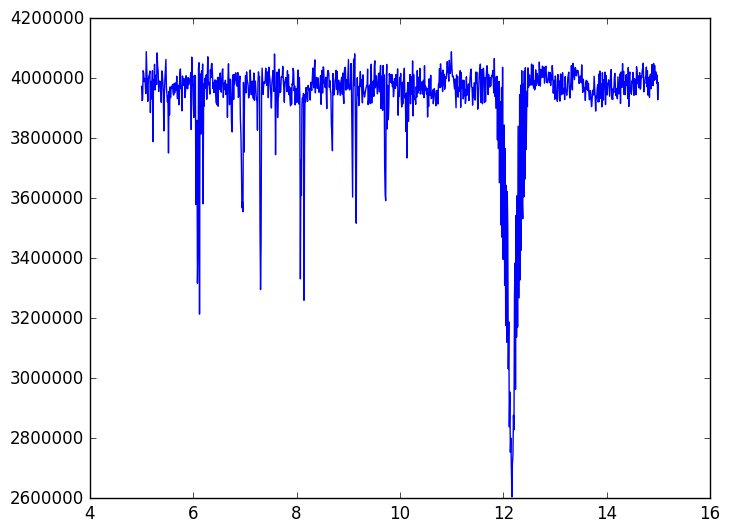

In [9]:
plot(linspace(5, 15, 1000), sumslist);

## Phase fold the light curve to see the transit

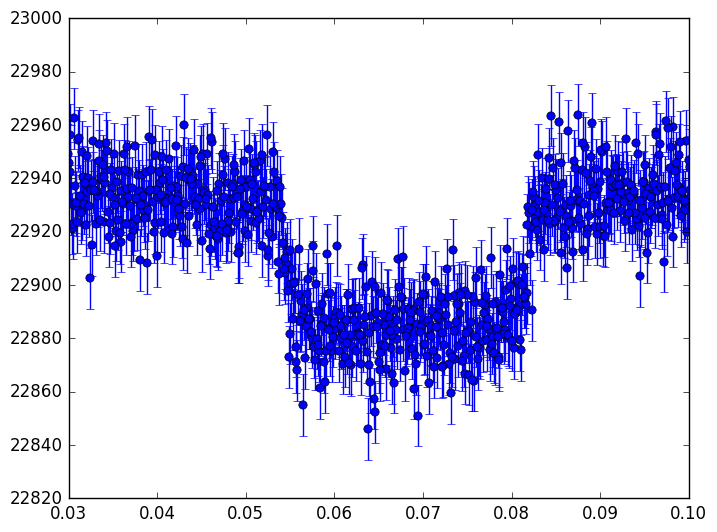

In [48]:
foldTimes = time / period   # divide by period to convert to phase
foldTimes = foldTimes % 1   # take fractional part of phase only (i.e. discard whole number part)

# plot folded lightcurve
errorbar(foldTimes,flux,yerr=err,linestyle="none",marker="o")
xlim(0.03,0.1)
show()


In [15]:
t0=0.6677287964428983

0.6677287964428983

In [39]:
a%b

1x5 Array{Int64,2}:
 1  0  1  0  1

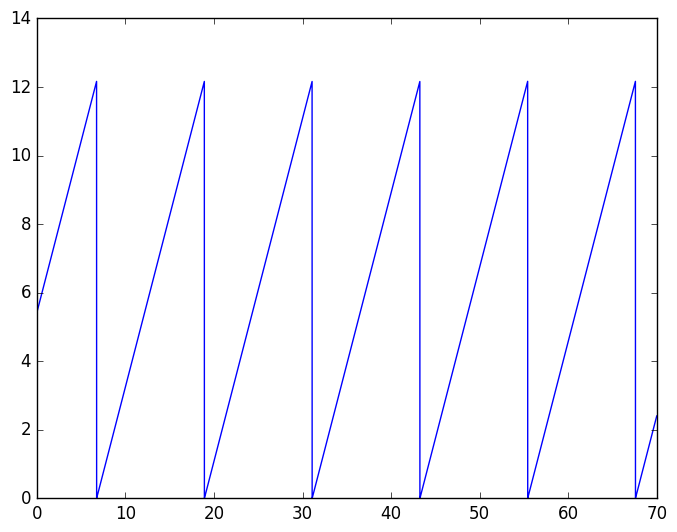

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32678b450>

In [57]:
plot(time, (time-t0 +period/2)%period)
